<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Future_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
px.scatter(data_frame=data, x='Sales', y ='TV',
           size='TV', trendline='ols')

In [8]:
px.scatter(data_frame=data, x='Sales', y='Newspaper',
           size='Newspaper', trendline='ols')

In [9]:
px.scatter(data_frame=data, x='Sales', y='Radio',
           size='Radio', trendline='ols')

In [11]:
correlation = data.corr()
print(correlation['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


Text(0.5, 1.0, 'Correlation')

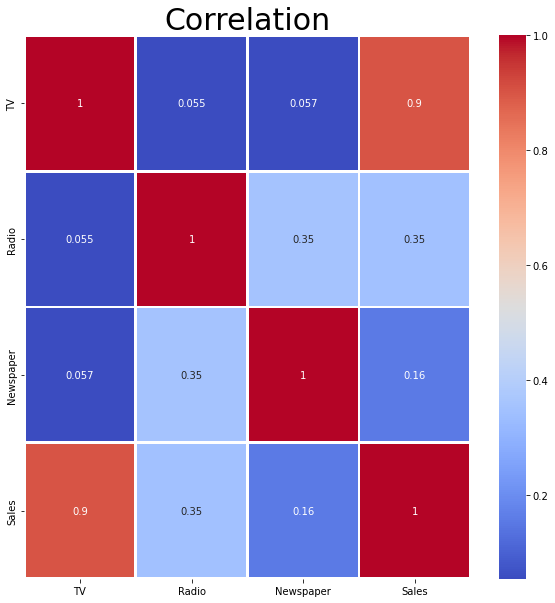

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, linewidths=2,linecolor='white', annot=True, cmap='coolwarm')
plt.title('Correlation', fontsize=30)


In [25]:
x = np.array(data.drop(["Sales"],1)) 
y = np.array(data["Sales"]) 

x_train,x_test,y_train,y_test= train_test_split(x,y,
                                                test_size=0.2,
                                                random_state=42)

<ipython-input-25-c7f5696d392c>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [27]:
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_test,y_test))

0.9059011844150825


In [28]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37254028]
